# NeuroFlow Data Team Take-Home Project 
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

## Importing Libraries.

In [285]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
import scipy.stats
import re
from collections import Counter
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

## Data Exploration

In [6]:
df = pd.read_csv('subj_measures.csv')
df.head()

,date,user_id,type,value
0,2019-06-08T23:19:34.418Z,61,mood,2.76
1,2019-06-13T16:33:34.399Z,26,sleep,2.44
2,2018-12-26T14:24:00.436Z,10,sleep,1.88
3,2019-07-17T20:11:23.792Z,33,mood,2.20
4,2019-05-09T17:27:50.900Z,17,mood,4.00


In [7]:
df.shape

(7460, 4)

In [196]:
df.describe()

,user_id,value
count,7460.000000,7460.000000
mean,50.197051,2.406454
std,26.317715,1.153750
min,0.000000,0.000000
25%,32.000000,1.599209
50%,52.000000,2.400000
75%,69.000000,3.400000
max,99.000000,4.000000


In [197]:
df.dtypes

date        object
user_id      int64
type        object
value      float64
dtype: object

In [198]:
df.isnull().sum()

date       0
user_id    0
type       0
value      0
dtype: int64

In [287]:
##I want to dommy the type
just_dummies = pd.get_dummies(df['type'])
df1=pd.concat([df,just_dummies],axis=1)
df1.drop(['type'], inplace=True, axis=1)
date1=[]
for i in df1['date']:
    date1.append(i[:10])
##because the time is the local time 
df1=pd.concat([pd.Series(date1),df1],axis=1)
df1['date']=df1[0]
df1=df1.iloc[:,1:]
sample=df1
sample1=df1

In [12]:
plt.style.use('fivethirtyeight')

### Frequency,Average and Median

most records are sleep and mood records. There are small part about Stress.

In [288]:

word_counts = Counter()
for word in df['type']:
    word_counts[word] += 1
    
for word, count in word_counts.most_common()[0:10]:
    print(word, count)

sleep 3415
mood 3397
anticipatoryStress 332
ruminationStress 316


#### people always will record sleep and mood but rarely record the stress. If we need more information about the treatment, we need more record about the stress or their life style.for example:
    ####how many times do you go to the gym this week?(record once a week on every Sunday)
    ####do you meet your friends in this week?(record once a week)

In [289]:
## calculate arithmetic mean and median with numpy
type=['mood','sleep','anticipatoryStress','ruminationStress']
for i in type:    
    print(str(i),'\n',np.mean((df1[df1[i]==1]['value'])), '\n',
         np.median((df1[df1[i]==1]['value'])))


mood 
 2.4042158315151307 
 2.4
sleep 
 2.404878249280746 
 2.4
anticipatoryStress 
 2.4959099361256665 
 2.56187716007
ruminationStress 
 2.3535578529942494 
 2.3011238575000004


In [293]:
###make individual dict
names=locals()
users=[]
def separate(data):
    for i in data['user_id']:
        users.append(i)
        names['df'+str(i)]=data[data['user_id']==i]
    
    

In [294]:
##make individual type
def separate2(data):
    type=['mood','sleep','anticipatoryStress','ruminationStress']
    for k in users:
        for j in type:
            names[str(j)+str(k)]=names['df'+str(k)][names['df'+str(k)][str(j)]==1]['value']
            names[str(j)+str(k)+'_Date']=names['df'+str(k)][names['df'+str(k)][str(j)]==1]['date']
    

In [295]:
##make nidividual type dict
def personal(data):
    type=['mood','sleep','anticipatoryStress','ruminationStress']
    for j in users:
        for i in type:
            names[str(i)+str(j)+'_dict']=dict(zip(names[str(i)+str(j)+'_Date'],
                                          names[str(i)+str(j)]))   

In [296]:
separate(sample)
separate2(sample)
personal(sample)

In [21]:
##type+id+dict can see the record

mood26_dict

{'2019-01-30': 1.8399999,
 '2019-04-04': 3.2315330505400004,
 '2019-07-05': 1.8399999,
 '2018-12-25': 0.930442094803,
 '2019-01-10': 1.6289186477700002,
 '2018-11-24': 3.34313869476,
 '2019-06-21': 4.0,
 '2018-11-29': 3.6,
 '2019-05-07': 2.6399999,
 '2019-03-25': 0.933867692947,
 '2018-08-20': 2.6283996105200003,
 '2018-11-19': 2.0,
 '2019-02-11': 3.2,
 '2018-12-21': 0.7525949478149999,
 '2018-11-06': 4.0,
 '2018-11-02': 3.88,
 '2019-05-31': 0.861120700836,
 '2018-09-10': 3.0}

In [297]:
df26.head()

,date,user_id,value,anticipatoryStress,mood,ruminationStress,sleep
1,2019-06-13,26,2.44000,0,0,0,1
138,2019-01-30,26,1.84000,0,1,0,0
273,2018-09-19,26,3.64000,0,0,0,1
307,2018-12-17,26,1.30772,0,0,0,1
449,2018-12-05,26,4.00000,0,0,0,1


In [300]:
##then we order the dict
from collections import OrderedDict
def sort_key(old_dict, reverse=False):
    keys = sorted(old_dict.keys(), reverse=reverse)
    new_dict = OrderedDict()
    for key in keys:
        new_dict[key] = old_dict[key]
    return new_dict


In [301]:
for j in type:
    for i in users:    
        names[str(j)+str(i)+'_dict']=sort_key(names[str(j)+str(i)+'_dict'])

## Data Visualization

### Any type of users'record.                       n=one of the type            m= user id

In [302]:
def one_chart(n,m):
    line_fig = plt.figure(figsize = (36, 15))
    a=str(n)
    
    _=plt.plot(names[a+str(m)+'_dict'].keys(), names[a+str(m)+'_dict'].values(), marker='o', mec='r', mfc='w')
    _ = plt.title(a+" tracking", fontsize = 25)

    ## Set the y-label
    _ = plt.ylabel("rate", fontsize = 15)

    ## Set the y-label
    _ = plt.xlabel("Time", fontsize = 15)
    _=plt.xticks(rotation=45)

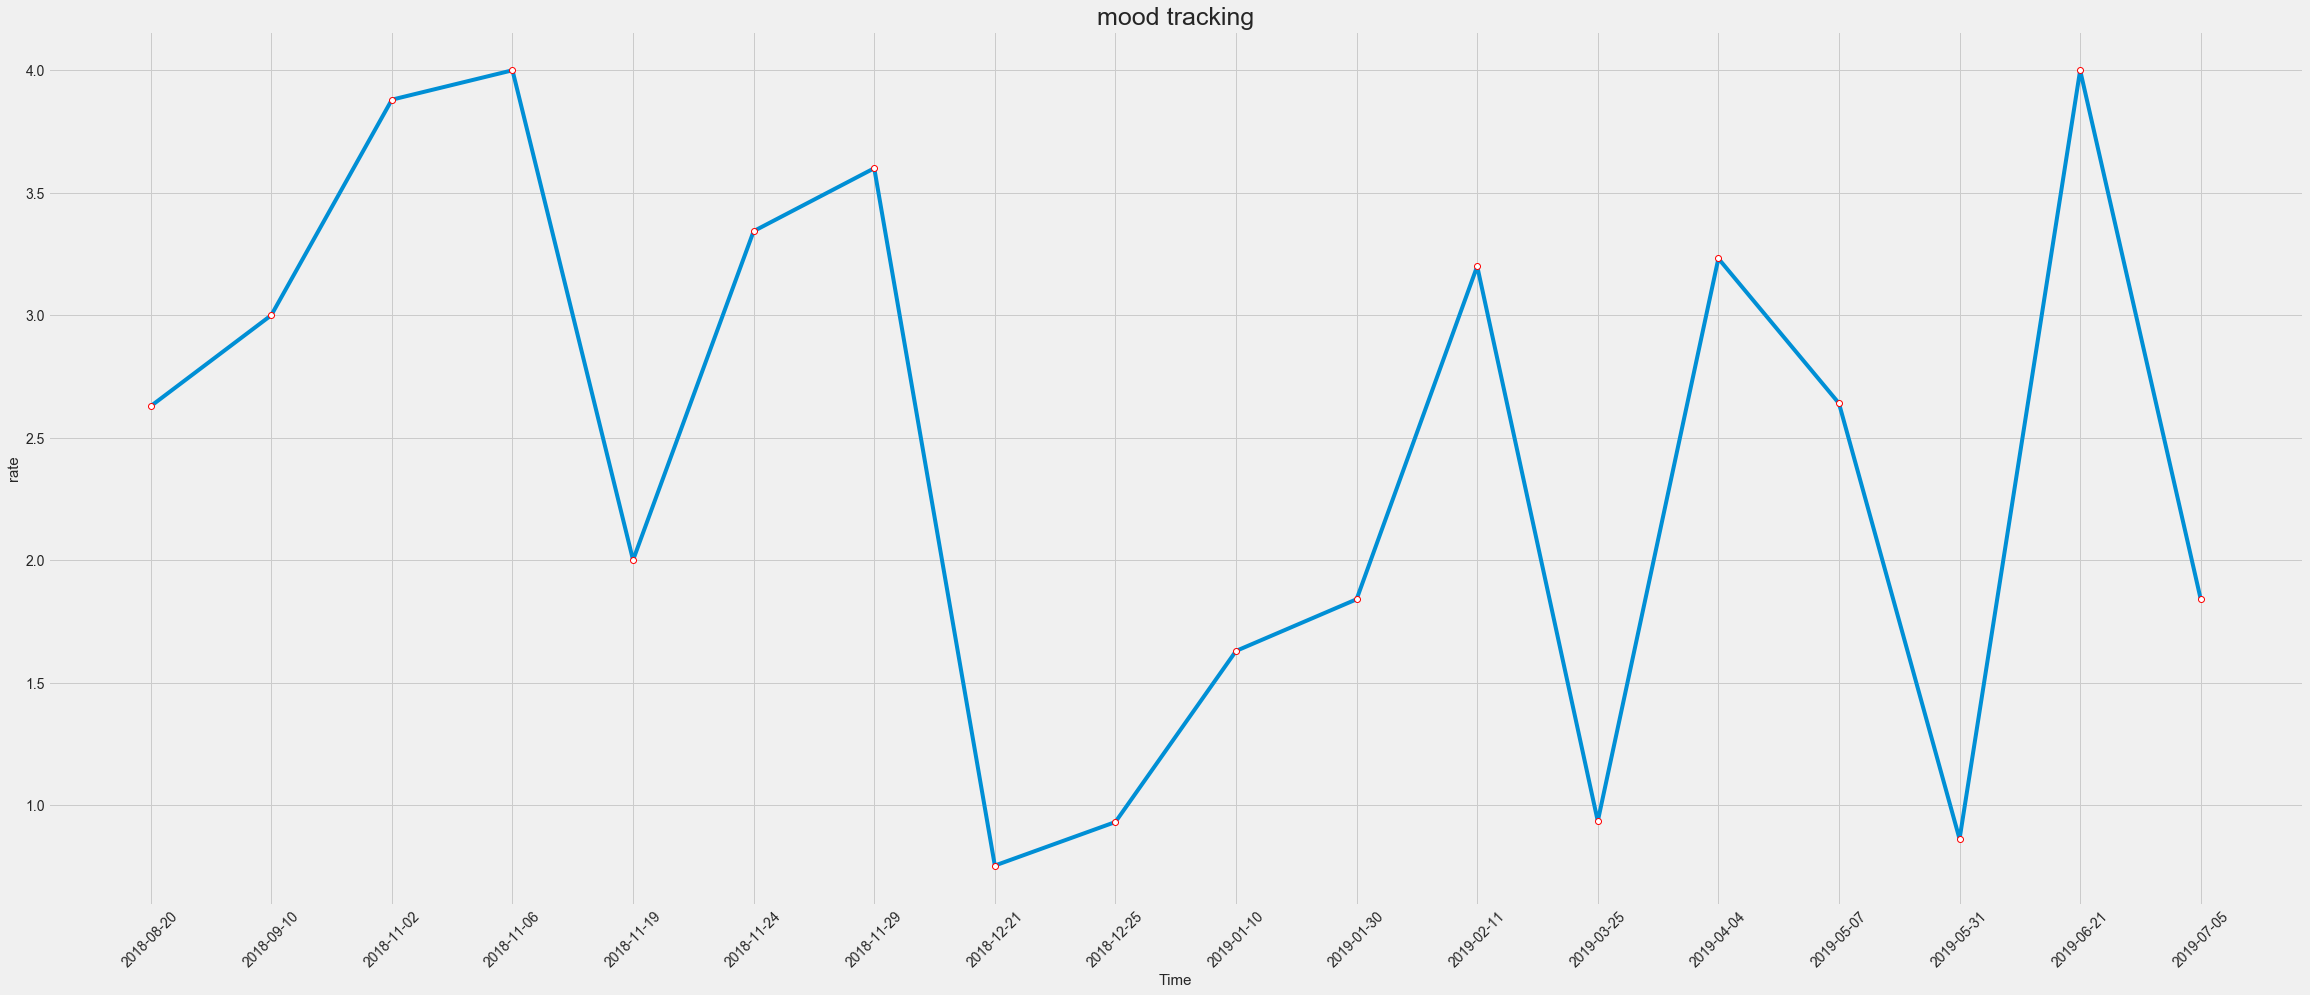

In [303]:
one_chart('mood',26)###type=mood users'id=26

# Four separate chart (m=user id)

In [102]:
#line chart for anyone type and id
def chart(m):
    fig = plt.figure(figsize = (40, 20))
    ax1 = fig.add_subplot(2,2,1)    
    _=plt.plot(names['sleep'+str(m)+'_dict'].keys(), names['sleep'+str(m)+'_dict'].values(), marker='o', mec='r', mfc='w')
    _ = plt.title('sleep'+'tracking', fontsize = 25)
    ## Set the y-label
    _ = plt.ylabel("rate", fontsize = 15)
    ## Set the y-label
    _ = plt.xlabel("Time", fontsize = 15)
    _=plt.xticks(rotation=45)
    
    ax2 = fig.add_subplot(2,2,2)
    _ =plt.plot(names['mood'+str(m)+'_dict'].keys(), names['mood'+str(m)+'_dict'].values(), marker='*', mec='r', mfc='w',color='r')
    _ = plt.title('mood'+" tracking", fontsize = 25)
    ## Set the y-label
    _ = plt.ylabel("rate", fontsize = 15)
    ## Set the y-label
    _ = plt.xlabel("Time", fontsize = 15)
    _=plt.xticks(rotation=45)
    ax3 = fig.add_subplot(2,2,3)
    _ =plt.plot(names['anticipatoryStress'+str(m)+'_dict'].keys(), names['anticipatoryStress'+str(m)+'_dict'].values(),color='c' ,marker='+', mec='r', mfc='w')
    _ = plt.title('anticipatoryStress'+" tracking", fontsize = 25)
    ## Set the y-label
    _ = plt.ylabel("rate", fontsize = 15)
    ## Set the y-label
    _ = plt.xlabel("Time", fontsize = 15)
    _=plt.xticks(rotation=45)              
    ax4 = fig.add_subplot(2,2,4)
    _ =plt.plot(names['ruminationStress'+str(m)+'_dict'].keys(), names['ruminationStress'+str(m)+'_dict'].values(), color='g',marker='x', mec='r', mfc='w')
    _ = plt.title('ruminationStress'+" tracking", fontsize = 25)
    ## Set the y-label
    _ = plt.ylabel("rate", fontsize = 15)
    ## Set the y-label
    _ = plt.xlabel("Time", fontsize = 15)
    _=plt.xticks(rotation=45)


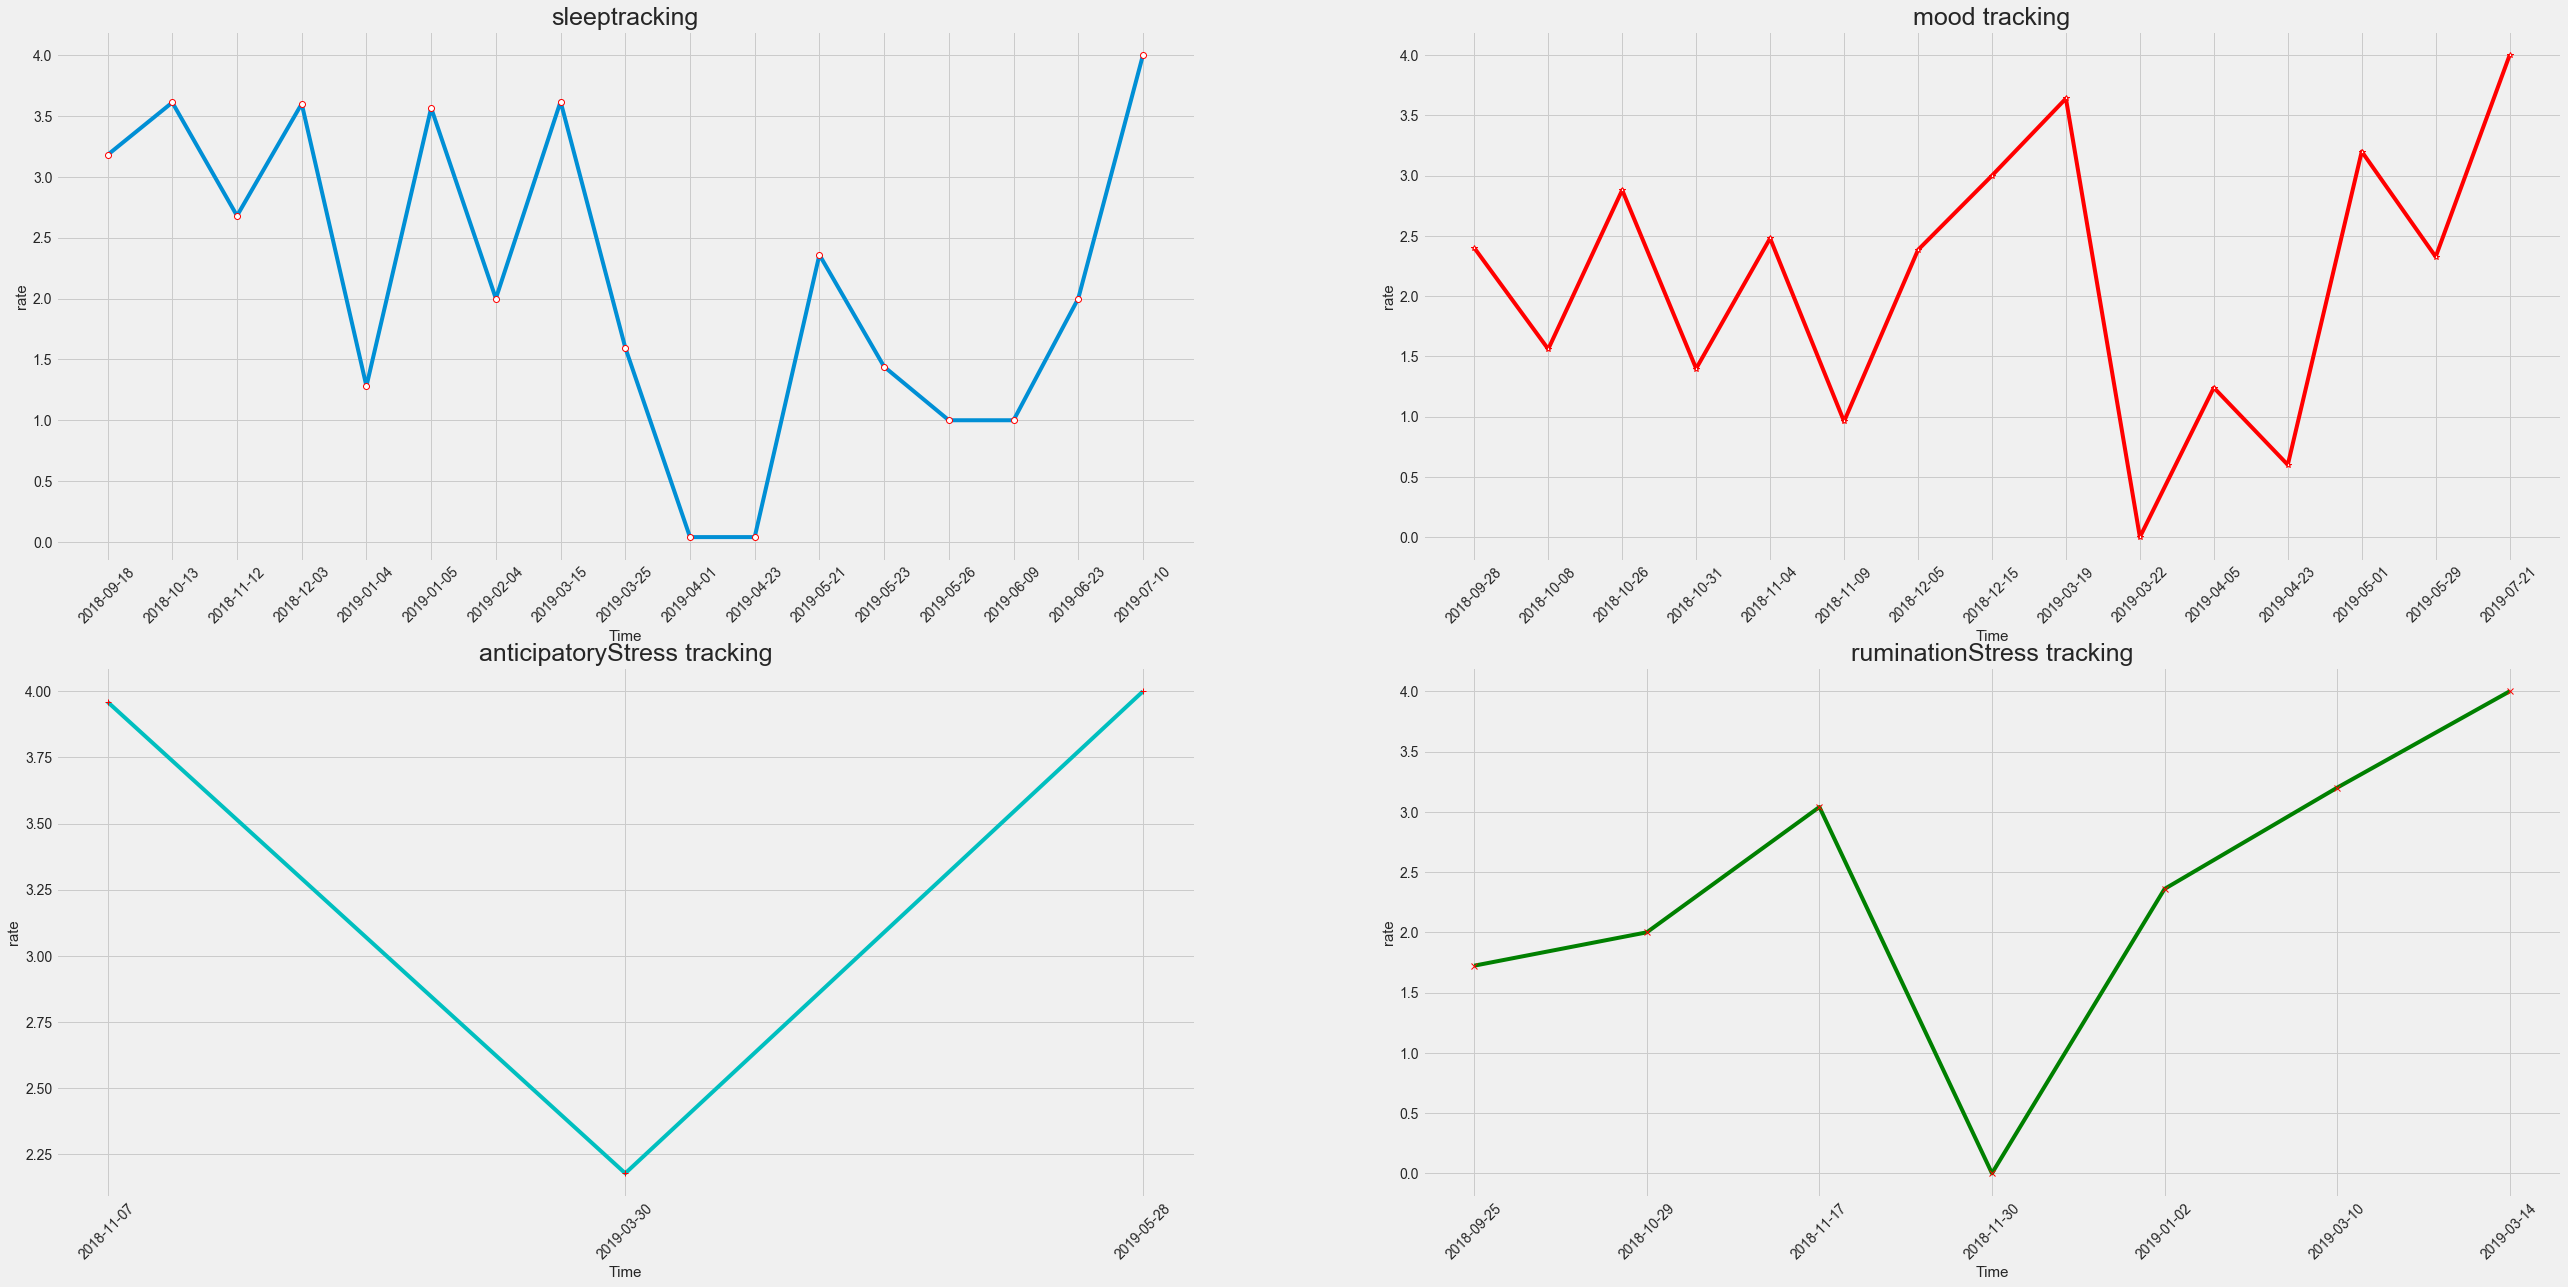

In [304]:
chart(30)

### Four rates on one sheet

In [305]:
##build individual chart:
from datetime import datetime
def four_charts(number):
    record={}
    y1=[]
    y2=[]
    y3=[]
    y4=[]
    for i in type:
        record.update(names[str(i)+str(number)+'_dict'])
        record_date=sorted(record.keys())
        
    for k in record_date:
        if k in names['sleep'+str(number)+'_dict'].keys():
                y1.append(names['sleep'+str(number)+'_dict'][k])
        else:
            y1.append(None)

    for k in record_date:
        if k in names['mood'+str(number)+'_dict'].keys():
            y2.append(names['mood'+str(number)+'_dict'][k])
        else:
            y2.append(None)
            
    for k in record_date:
        if k in names['anticipatoryStress'+str(number)+'_dict'].keys():
            y3.append(names['anticipatoryStress'+str(number)+'_dict'][k])
        else:
            y3.append(None)
    for k in record_date:
        if k in names['ruminationStress'+str(number)+'_dict'].keys():
            y4.append(names['ruminationStress'+str(number)+'_dict'][k])
        else:
            y4.append(None)
    later=pd.DataFrame(list(zip(record_date,y1,y2,y3,y4)),columns=['date','sleep','mood','acxious','444'])
    later['date']=pd.to_datetime(later['date'])
    # 创建figure对象，可以指定大小
    fig = plt.figure(figsize=(36,10))

    # 指定颜色列表，区分不同的曲线
    colors = ['red', 'blue', 'green', 'orange']
    ylist=['sleep','mood','acxious','444']
    marker=['o','x','*','+']
    # 使用循环来绘制多条曲线
    for i in range(4):
        # 显示每条曲线的标签
        label = type[i]
        # 开始绘制每条曲线
        plt.plot(later['date'], later[ylist[i]], c=colors[i],marker=marker[i], label=label)
    plt.legend(loc='best')
    plt.title('four rate')
    plt.ylabel("rate", fontsize = 15)
    plt.xlabel("Time", fontsize = 15)
    plt.xticks(rotation=45)
    return y1, y2,y3,y4,record_date,later

In [330]:
##build individual chart:
from datetime import datetime
def four_charts(number):
    record={}
    y1=[]
    y2=[]
    y3=[]
    y4=[]
    for i in type:
        record.update(names[str(i)+str(number)+'_dict'])
        record_date=sorted(record.keys())
        
    for k in record_date:
        if k in names['sleep'+str(number)+'_dict'].keys():
                y1.append(names['sleep'+str(number)+'_dict'][k])
        else:
            y1.append(None)

    for k in record_date:
        if k in names['mood'+str(number)+'_dict'].keys():
            y2.append(names['mood'+str(number)+'_dict'][k])
        else:
            y2.append(None)
            
    for k in record_date:
        if k in names['anticipatoryStress'+str(number)+'_dict'].keys():
            y3.append(names['anticipatoryStress'+str(number)+'_dict'][k])
        else:
            y3.append(None)
    for k in record_date:
        if k in names['ruminationStress'+str(number)+'_dict'].keys():
            y4.append(names['ruminationStress'+str(number)+'_dict'][k])
        else:
            y4.append(None)
    later=pd.DataFrame(list(zip(record_date,y1,y2,y3,y4)),columns=['date','sleep','mood','acxious','rumi'])
    later['date']=pd.to_datetime(later['date'])
    # 创建figure对象，可以指定大小
    fig = plt.figure(figsize=(36,10))

    # 指定颜色列表，区分不同的曲线
    colors = ['red', 'blue', 'green', 'orange']
    ylist=['sleep','mood','acxious','rumi']
    marker=['o','x','*','+']
    # 使用循环来绘制多条曲线
    for i in range(4):
        # 显示每条曲线的标签
        label = type[i]
        # 开始绘制每条曲线
        plt.plot(later['date'], later[ylist[i]], c=colors[i],marker=marker[i], label=label)
    plt.legend(loc='best')
    plt.title('four rate')
    plt.ylabel("rate", fontsize = 15)
    plt.xlabel("Time", fontsize = 15)
    plt.xticks(rotation=45)
    

    return


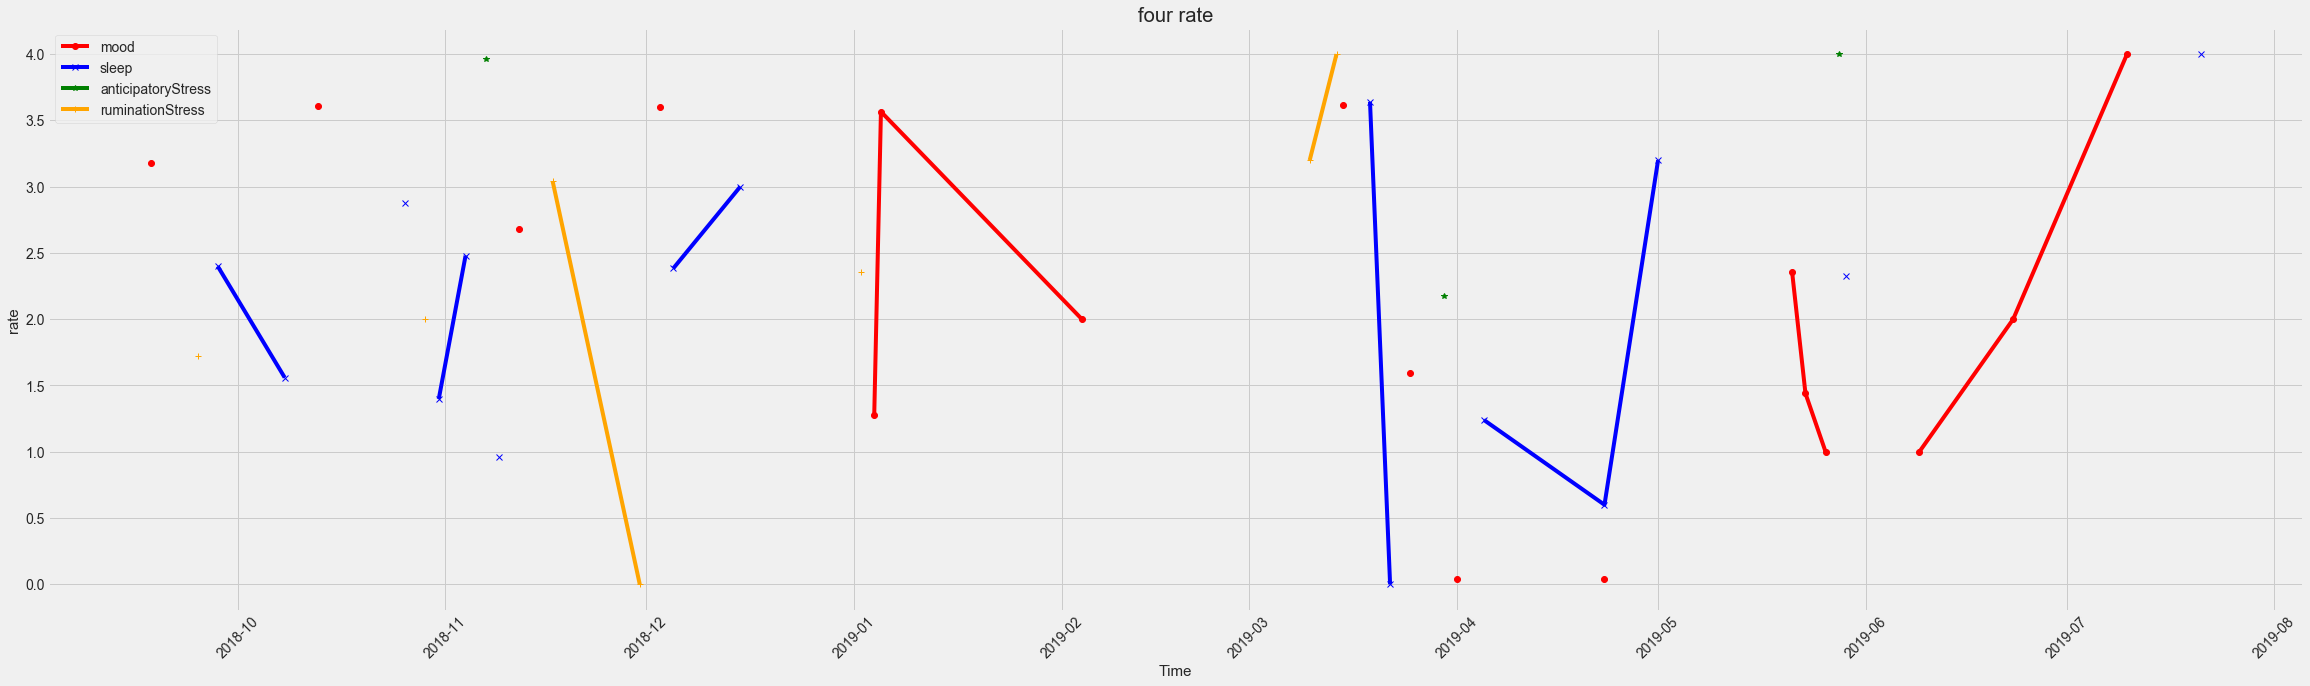

In [331]:
four_charts(30)

#### because there are some NULL value in the record, we cannot see the clear trend, here I use Tableau finish the visualization

## Clustering using K- means
### 1.build the data stucture(the first day's record)
as mntioned in the below, we need to help people find the group which has the similar patients. we can use clustering analysis.
here we only discuss the patients who have all four kinds of rates.

In [366]:
mood=[]
sleep=[]
anticipatoryStress=[]
ruminationStress=[]
for j in users:
    a= list(names['sleep'+str(j)+'_dict'].values())[0]
    sleep.append(a)
for j in users:
    b= list(names['mood'+str(j)+'_dict'].values())[0]
    mood.append(b)
anti_user_list=sample[sample['anticipatoryStress']==1]['user_id'].tolist()
for j in anti_user_list:
    c= list(names['anticipatoryStress'+str(j)+'_dict'].values())[0]
    anticipatoryStress.append(c)

rumi_user_list=sample[sample['ruminationStress']==1]['user_id'].tolist()
for j in rumi_user_list:
    d= list(names['ruminationStress'+str(j)+'_dict'].values())[0]
    ruminationStress.append(d)


In [381]:
mood_sleep=pd.DataFrame(list(zip(users,mood,sleep)),columns=['users_id','mood','sleep'])
anti=pd.DataFrame(list(zip(anti_user_list,anticipatoryStress)),columns=['users_id','anticipatoryStress'])
rumi=pd.DataFrame(list(zip(rumi_user_list,ruminationStress)),columns=['users_id',"ruminationStress"])

In [386]:
merge1=pd.merge(mood_sleep,anti,how='inner',on='users_id')
merge2=pd.merge(merge1,rumi,how='inner',on='users_id')

In [389]:
#drop the duplicate rows
merge2.drop_duplicates(subset=None, keep='first', inplace=False)

,users_id,mood,sleep,anticipatoryStress,ruminationStress
0,26,2.628400,3.640000,4.000000,2.520000
82,10,2.063652,2.338464,1.800000,3.360000
15174,33,2.073991,1.760000,1.560000,3.000000
133164,17,0.019238,1.670678,3.000000,0.806639
263184,39,2.455785,2.000000,2.000000,3.080000
283960,51,4.000000,3.960000,2.278248,1.854103
284188,96,3.649854,2.700416,3.762026,3.422068
284262,23,3.960000,1.640000,3.658882,3.600000
286686,84,2.601056,2.000000,3.000000,4.000000
286902,16,4.000000,2.120000,1.920000,0.000000


In [396]:

X1 = merge2[['sleep' , 'mood',"anticipatoryStress","ruminationStress"]].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

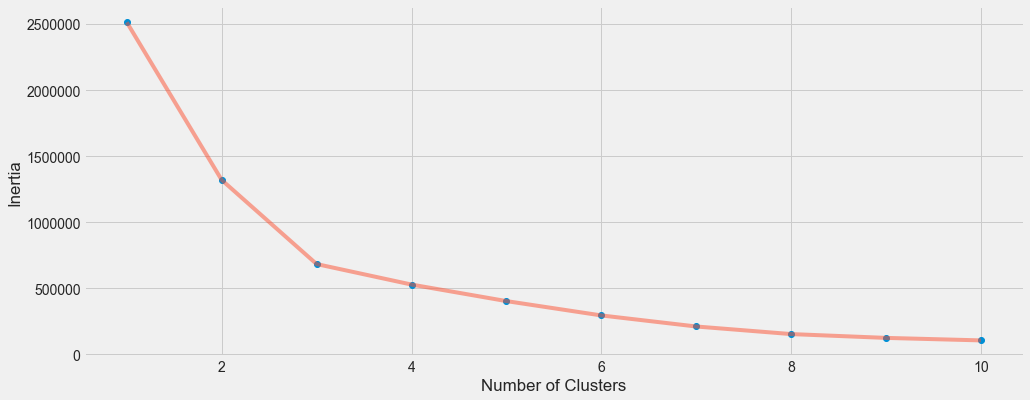

In [399]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [432]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)

## SLEEP AND MOOD

#### As we can see in the clustering. There are two knids of clustering. There are several kind of users. 
GREEN spots: cluster 1 has the highest rate of sleep and mood but easy to fall into rumination Stress. 
YELLOW spots: cluster 2 has terrible sleep and also the lowest mood rate. The users in this cluster need to improve the quantity of sleep. 
    But they have relatively small rumination Stress. 
BLUE spots: Cluster 3 has relatively good mood and below average quantity of sleep. We can see in the second chart they have relatively good rumination Stress rate and paticipatory stress. This  is also the biggest part amont the clusters. we need more information to specialize them.
PURPLE spots: Cluster 4 has good sleep but bad mood or bad sleep and good mood, but the number of observations is too small to conclude.


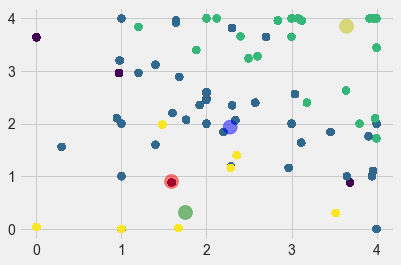

In [434]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
clusters = y_kmeans
plt.scatter(centers[:, 0], centers[:, 1], c=['r','b','y','g'], s=200, alpha=0.5);

## ANTICIPATORY AND RUMINATION STRESS

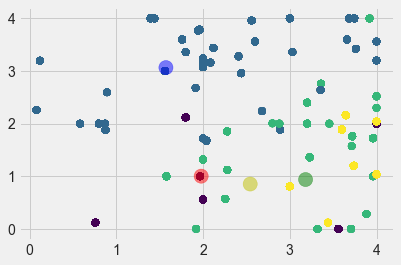

In [435]:
plt.scatter(X1[:, 2], X1[:, 3], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c=['r','b','y','g'], s=200, alpha=0.5);

<BarContainer object of 4 artists>

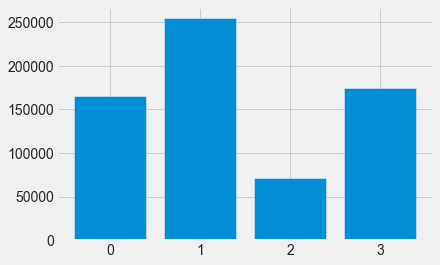

In [436]:
cluster1=[0,1,2,3]
counter3=Counter()
for i in y_kmeans:
    counter3[i] += 1
    
counter3
plt.bar(x=[0,1,2,3],height=[counter3[i] for i in range(4) ])
#plt.figure(1 , figsize = (15 ,6))

#plt.plot(counter3.keys(),counter3.value())